In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.shape

(83439, 48)

In [3]:
df.head(3)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN


In [4]:
df = df[['Country','EdLevel',"YearsCodePro",'Employment',"ConvertedCompYearly"]]

In [5]:
df = df.rename({"ConvertedCompYearly":"Salary"},axis =1)

In [6]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10,"Independent contractor, freelancer, or self-em...",NaN


In [7]:
df.describe()

,Salary
count,4.684400e+04
mean,1.184262e+05
std,5.272944e+05
min,1.000000e+00
25%,2.702500e+04
50%,5.621100e+04
75%,1.000000e+05
max,4.524131e+07


##Dropping the na values in Salary

In [8]:
df =df[df["Salary"].notnull()]
df.head()
df.shape

(46844, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46844 entries, 0 to 83438
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       46844 non-null  object 
 1   EdLevel       46823 non-null  object 
 2   YearsCodePro  46391 non-null  object 
 3   Employment    46831 non-null  object 
 4   Salary        46844 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

##Only keep data points that are full time employed 

In [12]:
df = df[df["Employment"] == "Employed full-time"]


##And now drop the employement column

In [13]:
df =  df.drop('Employment',axis = 1)

In [14]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,46135.0


In [15]:
df.Country.value_counts()

United States of America                                9175
India                                                   3385
Germany                                                 2753
United Kingdom of Great Britain and Northern Ireland    2604
Canada                                                  1553
                                                        ... 
Saint Kitts and Nevis                                      1
Monaco                                                     1
Libyan Arab Jamahiriya                                     1
Somalia                                                    1
Burundi                                                    1
Name: Country, Length: 166, dtype: int64

In [16]:
def shorten_categories(cat,cut_off):
    cat_map = {}
    for i in range(len(cat)):
        if cat.values[i] >= cut_off:
            cat_map[cat.index[i]] = cat.index[i]
        else:
            cat_map[cat.index[i]] = "other"
    return cat_map

In [17]:
country_map = shorten_categories(df.Country.value_counts(),400)
df['Country'] = df['Country'].map(country_map)

In [18]:
df.Country.value_counts()

other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

# Inspect Salary Range

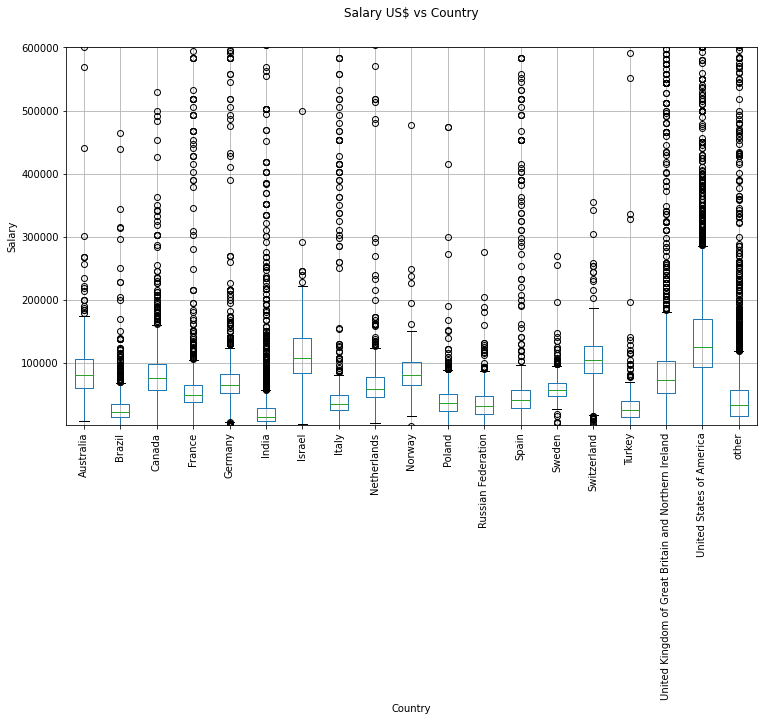

In [19]:
fig,ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary","Country",ax =ax)
plt.suptitle("Salary US$ vs Country")
plt.title(" ")
plt.ylabel("Salary")
ax.set_ylim(1000,600000)
plt.xticks(rotation =90)
plt.show()

## Dropping outliers and sticking to the mean values

In [20]:
df.Country.value_counts()

other                                                   10725
United States of America                                 9175
India                                                    3385
Germany                                                  2753
United Kingdom of Great Britain and Northern Ireland     2604
Canada                                                   1553
France                                                   1396
Brazil                                                   1340
Spain                                                     890
Netherlands                                               835
Australia                                                 825
Poland                                                    775
Italy                                                     756
Russian Federation                                        741
Sweden                                                    735
Turkey                                                    458
Switzerl

In [21]:
df =df[df["Salary"] <= 200000]
df =df[df["Salary"] >= 1000]


In [22]:
df =df[df["Country"] != "other"]
df.Country.value_counts()

United States of America                                7753
India                                                   3277
Germany                                                 2611
United Kingdom of Great Britain and Northern Ireland    2345
Canada                                                  1475
Brazil                                                  1317
France                                                  1313
Spain                                                    818
Netherlands                                              807
Australia                                                768
Poland                                                   767
Russian Federation                                       733
Sweden                                                   727
Italy                                                    691
Turkey                                                   452
Israel                                                   406
Switzerland             

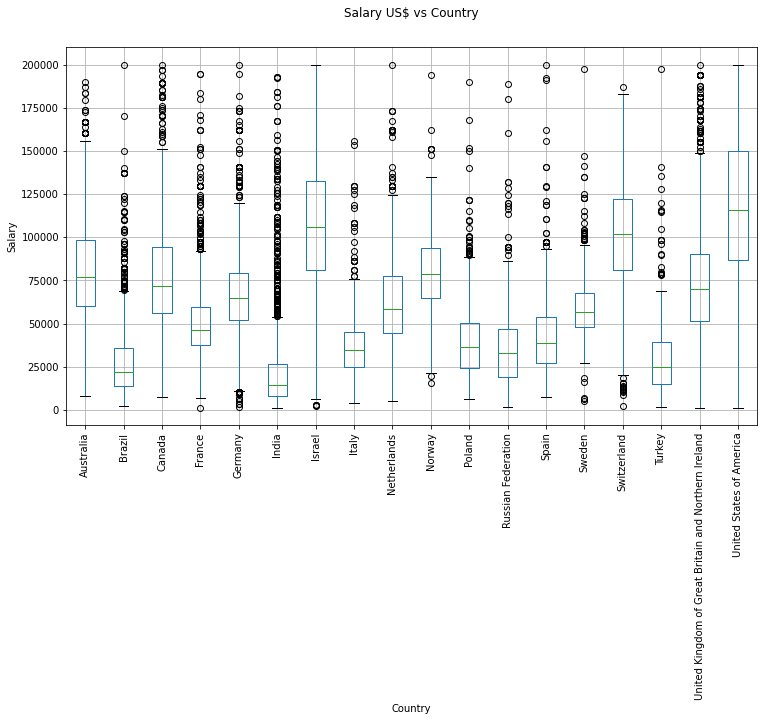

In [23]:
fig,ax = plt.subplots(1,1,figsize = (12,7))
df.boxplot("Salary","Country",ax =ax)
plt.suptitle("Salary US$ vs Country")
plt.title(" ")
plt.ylabel("Salary")
# ax.set_ylim(1000,600000)
plt.xticks(rotation =90)
plt.show()

## Cleaning the years column

In [24]:
df.YearsCodePro.unique()

array(['4', '5', '6', '2', '18', '21', '16', '10', 'Less than 1 year',
       '3', '15', '12', '8', '17', '1', '14', '7', '26', '34', '11', '25',
       '24', '22', '13', '9', '39', '20', '27', '23', '30', '19', '35',
       '33', '43', '40', '29', '38', '31', '42', '28', '46', '32', '36',
       '37', '47', '44', '45', '41', 'More than 50 years', '50', '49',
       '48'], dtype=object)

In [25]:
def clean_exp(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 50
    return float(x)

In [26]:
df.YearsCodePro =df.YearsCodePro.apply(clean_exp)

In [27]:
df.YearsCodePro.unique()

array([ 4. ,  5. ,  6. ,  2. , 18. , 21. , 16. , 10. ,  0.5,  3. , 15. ,
       12. ,  8. , 17. ,  1. , 14. ,  7. , 26. , 34. , 11. , 25. , 24. ,
       22. , 13. ,  9. , 39. , 20. , 27. , 23. , 30. , 19. , 35. , 33. ,
       43. , 40. , 29. , 38. , 31. , 42. , 28. , 46. , 32. , 36. , 37. ,
       47. , 44. , 45. , 41. , 50. , 49. , 48. ])

In [28]:
df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', 'Something else',
       'Primary/elementary school', 'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],
      dtype=object)

In [29]:
def clean_edu (x):
    if "Master’s degree" in x:
        return "Master's Degree"
    if "Bachelor’s degree" in x:
        return "Bachelor’s Degree"
    if "Professional degree" in x or "doctoral degree" in x :
        return "Post grad"
    return "Less than a bachelors"

In [30]:
df.EdLevel = df.EdLevel.apply(clean_edu)

In [31]:
df.EdLevel.unique()

array(["Master's Degree", 'Bachelor’s Degree', 'Post grad',
       'Less than a bachelors'], dtype=object)

## Feature Encoding 

In [32]:
from sklearn.preprocessing import LabelEncoder
le_edu =LabelEncoder()
df['EdLevel'] = le_edu.fit_transform(df['EdLevel'])

In [33]:
le_country  =LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])

In [34]:
df.Country.unique()

array([13, 12,  4, 15,  2,  3, 14, 16, 11,  6, 17,  1,  7,  8, 10,  5,  0,
        9])

In [35]:
X =df.drop("Salary",axis = 1)
y = df['Salary']

In [36]:
from sklearn.linear_model import LinearRegression
### Need to do train test split here

In [37]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression()

In [38]:
y_pred = lm.predict(X)

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y,y_pred))

In [40]:
error

37600.85223072214

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

tree.fit(X,y.values)

DecisionTreeRegressor()

In [42]:
y_pred = tree.predict(X)

In [43]:
error = np.sqrt(mean_squared_error(y,y_pred))

In [44]:
error

26392.607222484552

In [45]:
from sklearn.ensemble  import RandomForestRegressor

rf =RandomForestRegressor(random_state=0)
rf.fit(X,y.values)


RandomForestRegressor(random_state=0)

In [46]:
y_pred =  rf.predict(X)

In [47]:
error = np.sqrt(mean_squared_error(y,y_pred))

In [48]:
error

26451.026651155615

In [49]:
from sklearn.model_selection import GridSearchCV, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error')

gs.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [50]:
regressor = gs.best_estimator_

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

error = np.sqrt(mean_squared_error(y_pred,y_test))
error

28023.623215266176

In [65]:
#
import numpy as np
x= np.array([["United States", 'Master’s degree', 15 ]])




[['India', "Master's Degree", 1]]

In [70]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_education.transform(x[:,1])
x = x.astype(float)
x

TypeError: list indices must be integers or slices, not tuple

In [52]:
import pickle
import numpy as np

In [53]:
d = {"model":regressor,"le_country":le_country,"le_edu":le_edu}

with open ("saved_steps.pkl",'wb') as file:
    pickle.dump(d,file)

In [54]:
with open('saved_steps.pkl','rb') as f:
    pk = pickle.load(f)



In [56]:

regressor_loaded = pk["model"]
le_c = pk["le_country"]
le_e =pk["le_edu"]

In [57]:
ex = np.array = ([[12,2,1]])  
y_pred = regressor_loaded.predict(ex)
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20160.08641975])